In [137]:
import numpy as np
import pandas as pd
from utility_functions2 import _find_consecutive_index_ranges
import scipy.io
from utility_functions import calculate_norm_accandgyro
import matplotlib.pyplot as plt
import nolds as nld
import os 
%matplotlib notebook

In [138]:
import seaborn as sns
from Gait_features import calculate_variability_activeperiod

In [139]:
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

Reading results of analyzed files

In [140]:
direct_path="results"

files=[f for f in os.listdir(direct_path) if os.path.isfile(os.path.join(direct_path,f))]

How many subjects are analyzed?

In [141]:
subjects_analyzed=[]
for f in files:

    if f.endswith(".npy"):
        subject_file=f[:-10]
        subjects_analyzed.append([subject_file,f])
        
subjects_analyzed=np.vstack(subjects_analyzed)

Reading excel file ....pick out analyzed subjects

In [142]:
file_name="ST_Falls_unblinded_Naima.xlsx"
fall_info_excel=pd.read_excel(file_name,usecols="A,D,E,F")
analyzed_subject_info = []
for s in subjects_analyzed:
    f=fall_info_excel.loc[fall_info_excel['StudyID']==s[0].replace(" ", "")].values.flatten().tolist()
    if len(f)>0:
        analyzed_subject_info.append(f+[s[1]])
    else:
        print(s)

['DNU285' 'DNU285_steps.npy']
['ILU2040' 'ILU2040_steps.npy']
['JDT236' 'JDT236_steps.npy']
['KND103' 'KND103_steps.npy']
['KXE664' 'KXE664_steps.npy']
['PAU1692' 'PAU1692_steps.npy']
['TUQ859' 'TUQ859_steps.npy']
['ZNU138' 'ZNU138_steps.npy']


In [143]:
analyzed_subject_info

[['ABJ828', 2, 0, 365, 'ABJ828_steps.npy'],
 ['AFX410', 2, 0, 365, 'AFX410_steps.npy'],
 ['AGD389', 2, 0, 365, 'AGD389_steps.npy'],
 ['AGR621', 2, 0, 365, 'AGR621_steps.npy'],
 ['AIZ298', 3, 0, 365, 'AIZ298_steps.npy'],
 ['AKJ742', 3, 0, 365, 'AKJ742_steps.npy'],
 ['AMH252', 3, 1, 194, 'AMH252_steps.npy'],
 ['AMP647', 3, 0, 365, 'AMP647_steps.npy'],
 ['ANF490', 3, 0, 365, 'ANF490_steps.npy'],
 ['AOE305', 2, 0, 365, 'AOE305_steps.npy'],
 ['APC254', 2, 1, 365, 'APC254_steps.npy'],
 ['AQC563', 3, 1, 56, 'AQC563_steps.npy'],
 ['AQF572', 3, 0, 365, 'AQF572_steps.npy'],
 ['AQX395', 3, 0, 365, 'AQX395_steps.npy'],
 ['ARY387', 3, 0, 107, 'ARY387_steps.npy'],
 ['ASN366', 2, 0, 365, 'ASN366_steps.npy'],
 ['ASR840', 2, 0, 365, 'ASR840_steps.npy'],
 ['ASU596', 3, 0, 365, 'ASU596_steps.npy'],
 ['AUG718', 3, 2, 365, 'AUG718_steps.npy'],
 ['AUO576', 2, 0, 365, 'AUO576_steps.npy'],
 ['AUS775', 3, 0, 365, 'AUS775_steps.npy'],
 ['AWB166', 2, 1, 365, 'AWB166_steps.npy'],
 ['AWH155', 3, 0, 365, 'AWH155_st

In [144]:
analyzed_subject_info=pd.DataFrame(data=analyzed_subject_info,columns=["subject_id","Group_id","nb_falls","follow_up","folder_name"])
analyzed_subject_info = analyzed_subject_info.astype(dtype= {"subject_id":"object",
        "nb_falls":"int32","follow_up":"int64"})

In [145]:
analyzed_subject_info

,subject_id,Group_id,nb_falls,follow_up,folder_name
0,ABJ828,2,0,365,ABJ828_steps.npy
1,AFX410,2,0,365,AFX410_steps.npy
2,AGD389,2,0,365,AGD389_steps.npy
3,AGR621,2,0,365,AGR621_steps.npy
4,AIZ298,3,0,365,AIZ298_steps.npy
...,...,...,...,...,...
306,YSZ293,3,1,365,YSZ293_steps.npy
307,ZDG461,3,0,365,ZDG461_steps.npy
308,ZIO230,3,0,365,ZIO230_steps.npy
309,ZPG674,2,0,365,ZPG674_steps.npy


In [146]:
len(analyzed_subject_info[(analyzed_subject_info['Group_id']==3)&(analyzed_subject_info['follow_up']<365)])

19

In [147]:
len(analyzed_subject_info[(analyzed_subject_info['Group_id']==3) & (analyzed_subject_info['nb_falls']==0)])

101

In [148]:
len(analyzed_subject_info[(analyzed_subject_info['follow_up']<365)])
len(analyzed_subject_info[(analyzed_subject_info['Group_id']==2)])
len(analyzed_subject_info[(analyzed_subject_info['Group_id']==2) & (analyzed_subject_info['nb_falls']==4)])
len(analyzed_subject_info[(analyzed_subject_info['Group_id']==3)])
len(analyzed_subject_info[(analyzed_subject_info['nb_falls']==0)])

194

In [149]:
print("the mean of nb falls %f"%(np.mean(analyzed_subject_info.loc[(analyzed_subject_info['Group_id']==3),"nb_falls"].values)))
print("the variance of nb falls %f"%(np.var(analyzed_subject_info.loc[(analyzed_subject_info['Group_id']==3),"nb_falls"].values)))

the mean of nb falls 0.607595
the variance of nb falls 1.099183


<IPython.core.display.Javascript object>


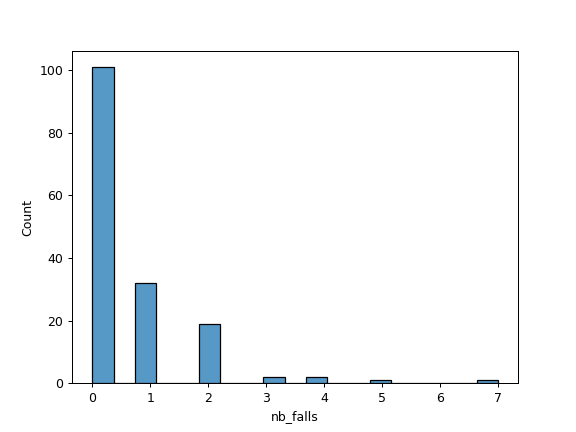

<AxesSubplot:xlabel='nb_falls', ylabel='Count'>

In [150]:
plt.figure()
sns.histplot(analyzed_subject_info[(analyzed_subject_info['Group_id']==3)], x="nb_falls")

In [151]:
f=files[0]
subject_file=f[:-10]
analyzed_subject_info.loc[analyzed_subject_info['subject_id']==subject_file.replace(" ", "")].values

array([['ABJ828', 2, 0, 365, 'ABJ828_steps.npy']], dtype=object)

Analysis of median variability with nb of falls

In [152]:
columns=["subject","No. bouts","No. steps","short percen",
         "med percen","long percen","SD short","SD med","SD long",
         "Cov short","Cov med","Cov long","SD all","Cov all","status","follow_up","Group_id"]

direct_path="results"

files=[f for f in os.listdir(direct_path) if os.path.isfile(os.path.join(direct_path,f))]
result_list=[]

short=60
mid=100
long=400

for f in files:

    if f.endswith(".npy"):

        filepath=direct_path +"//" +f

        subj2_steps=np.load(filepath)
        var_s2_df,stride_s2_df=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                                                  longest_walkingbout=short,remove_step=3)

        subject_file=f[:-10]
        number_walking_bout= len(var_s2_df)
        total_number_steps= np.sum(var_s2_df["N_steps"].values)

        percen_short= np.sum(var_s2_df["N_steps"].values<mid)*100/number_walking_bout

        percen_med=np.sum((var_s2_df["N_steps"].values>mid) & (var_s2_df["N_steps"].values<long))*100/number_walking_bout

        percen_long= np.sum(var_s2_df["N_steps"].values>long)*100/number_walking_bout

        var_short_SD=np.median(var_s2_df.loc[var_s2_df["N_steps"]<mid,"stridetime_std"].values)

        var_med_SD=np.median(var_s2_df.loc[(var_s2_df["N_steps"]>mid) & 
                                              (var_s2_df["N_steps"]<long) ,"stridetime_std"].values)


        var_long_SD=np.median(var_s2_df.loc[var_s2_df["N_steps"]>long,"stridetime_std"].values)


        var_short_Cov=np.median(var_s2_df.loc[var_s2_df["N_steps"]<mid,"stridetime_Cov"].values)

        var_med_Cov=np.median(var_s2_df.loc[(var_s2_df["N_steps"]>mid) & 
                                              (var_s2_df["N_steps"]<long) ,"stridetime_Cov"].values)


        var_long_Cov=np.median(var_s2_df.loc[var_s2_df["N_steps"]>long,"stridetime_Cov"].values)
        
        var_all_Cov=np.median(var_s2_df["stridetime_Cov"].values)
        
        var_all_SD=np.median(var_s2_df["stridetime_std"].values)
        
        

        f=analyzed_subject_info.loc[analyzed_subject_info['subject_id']==subject_file.replace(" ", "")].values

        if len(f)>0:

            status=f[0][2]

            follow_up=f[0][3]

            Group_id=f[0][1]
            
            result_list.append([subject_file,number_walking_bout,
                    total_number_steps,percen_short,percen_med,percen_long,
                    var_short_SD,var_med_SD,var_long_SD,var_short_Cov,var_med_Cov,
                                var_long_Cov,var_all_SD,var_all_Cov,status,follow_up,Group_id])

result=pd.DataFrame(data=result_list, columns=columns)


C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount


most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 


C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:28: RuntimeWarning: invalid value encountered in less
  percen_short= np.sum(var_s2_df["N_steps"].values<mid)*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:30: RuntimeWarning: invalid value encountered in greater
  percen_med=np.sum((var_s2_df["N_steps"].values>mid) & (var_s2_df["N_steps"].values<long))*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:30: RuntimeWarning: invalid value encountered in less
  percen_med=np.sum((var_s2_df["N_steps"].values>mid) & (var_s2_df["N_steps"].values<long))*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:32: RuntimeWarning: invalid value encountered in greater
  percen_long= np.sum(var_s2_df["N_steps"].values>long)*100/number_walking_bout
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  r

C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount


no step time left


C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount


most strides have been filtered because of misdetection 


C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:28: RuntimeWarning: invalid value encountered in less
  percen_short= np.sum(var_s2_df["N_steps"].values<mid)*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:30: RuntimeWarning: invalid value encountered in greater
  percen_med=np.sum((var_s2_df["N_steps"].values>mid) & (var_s2_df["N_steps"].values<long))*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:30: RuntimeWarning: invalid value encountered in less
  percen_med=np.sum((var_s2_df["N_steps"].values>mid) & (var_s2_df["N_steps"].values<long))*100/number_walking_bout
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/2933357286.py:32: RuntimeWarning: invalid value encountered in greater
  percen_long= np.sum(var_s2_df["N_steps"].values>long)*100/number_walking_bout
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  r

no step time left


C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib

C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\al-abiad\Anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount
C:\Users\al-abiad\Anaconda3\lib

In [153]:
result

,subject,No. bouts,No. steps,short percen,med percen,long percen,SD short,SD med,SD long,Cov short,Cov med,Cov long,SD all,Cov all,status,follow_up,Group_id
0,ABJ828,127,32120.0,44.881890,33.858268,20.472441,0.0350,0.0540,0.0410,3.3060,4.480,3.7685,0.0400,3.7700,0,365,2
1,AFX410,87,10858.0,47.126437,50.574713,2.298851,0.0510,0.0450,0.0225,4.4970,4.244,2.2255,0.0460,4.3240,0,365,2
2,AGD389,59,5995.0,69.491525,28.813559,0.000000,0.0710,0.0700,NaN,6.1260,5.690,NaN,0.0700,5.9390,0,365,2
3,AGR621,72,12897.0,33.333333,56.944444,8.333333,0.0420,0.0470,0.0435,3.8255,4.342,4.0210,0.0450,4.1090,0,365,2
4,AIZ298,76,14175.0,48.684211,36.842105,14.473684,0.0440,0.0415,0.0430,4.0690,3.736,3.8380,0.0425,3.8060,0,365,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,YSZ293,58,8967.0,46.551724,50.000000,3.448276,0.0680,0.0360,0.0480,6.5710,3.805,4.8400,0.0445,4.4335,1,365,3
307,ZDG461,206,37297.0,37.864078,53.883495,7.766990,0.0440,0.0360,0.0315,4.3780,3.827,3.5015,0.0370,3.9980,0,365,3
308,ZIO230,47,3774.0,82.978723,17.021277,0.000000,0.0630,0.0520,NaN,5.5730,4.753,NaN,0.0630,5.4640,0,365,3
309,ZPG674,37,2810.0,89.189189,10.810811,0.000000,0.0660,0.0525,NaN,4.6530,3.895,NaN,0.0620,4.6450,0,365,2


In [154]:
result_gr2=result[(result["Group_id"]==2)]

<IPython.core.display.Javascript object>


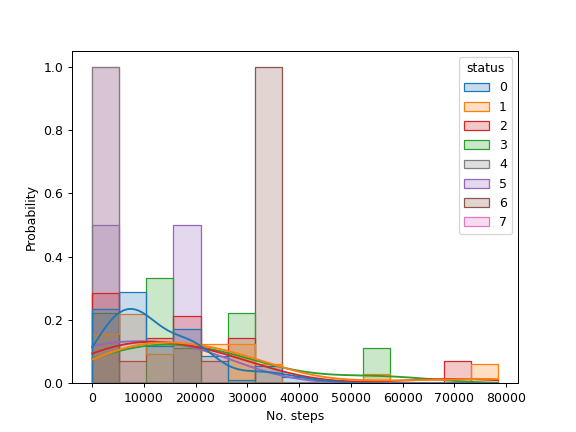

C:\Users\al-abiad\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\al-abiad\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='No. steps', ylabel='Probability'>

In [155]:
plt.figure()

unique = result_gr2["status"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=result_gr2, x="No. steps",hue="status", element="step", palette=palette, kde=True,stat="probability",common_norm=False)

In [156]:
var_subjects3=result_gr2[["No. steps",'No. bouts',"Cov long", "Cov med","Cov short","Cov all","status","follow_up"]]

In [157]:
var_subjects3.isnull().sum(axis = 0)

No. steps     0
No. bouts     0
Cov long     39
Cov med       1
Cov short     0
Cov all       0
status        0
follow_up     0
dtype: int64

In [158]:
np.sum(var_subjects3["status"]==0)

93

In [159]:
var_subjects3.rename(columns = {'Cov all':'Cov_all'}, inplace = True)
var_subjects3.rename(columns = {'No. steps':'N_steps'}, inplace = True)
var_subjects3.rename(columns = {'No. bouts':'N_bouts'}, inplace = True)
var_subjects3.rename(columns = {'Cov long':'Cov_long'}, inplace = True)
var_subjects3.rename(columns = {'Cov short':'Cov_short'}, inplace = True)
var_subjects3.rename(columns = {'Cov med':'Cov_med'}, inplace = True)


# var_subjects3=var_subjects3.dropna() 

C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/4202186179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects3.rename(columns = {'Cov all':'Cov_all'}, inplace = True)
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/4202186179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects3.rename(columns = {'No. steps':'N_steps'}, inplace = True)
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/4202186179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [160]:
expr = "status ~ Cov_all " #  + N_steps:Cov_all
y_train, X_train = dmatrices(expr, var_subjects3, return_type='dataframe')

In [167]:
y_train

,status
0,0.0
1,0.0
2,0.0
3,0.0
9,0.0
...,...
291,1.0
297,2.0
300,0.0
302,1.0


In [162]:
poisson_training_results = sm.GLM(y_train.values.astype("int64"), X_train, family=sm.families.Poisson(),exposure=var_subjects3["follow_up"].values).fit()

In [163]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  153
Model:                            GLM   Df Residuals:                      151
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.71
Date:                Fri, 06 May 2022   Deviance:                       242.20
Time:                        16:53:54   Pearson chi2:                     279.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04800
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0189      0.318    -22.037      0.0

In [164]:
poisson_predictions = poisson_training_results.get_prediction(X_train)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.001701  0.000218       0.001323       0.002187
1    0.001869  0.000204       0.001510       0.002314
2    0.002461  0.000248       0.002020       0.002998
3    0.001802  0.000209       0.001436       0.002261
9    0.002260  0.000213       0.001879       0.002717
..        ...       ...            ...            ...
291  0.001517  0.000238       0.001115       0.002064
297  0.001600  0.000229       0.001208       0.002118
300  0.002052  0.000198       0.001698       0.002481
302  0.001453  0.000246       0.001043       0.002024
309  0.001974  0.000199       0.001620       0.002405

[153 rows x 4 columns]


<IPython.core.display.Javascript object>


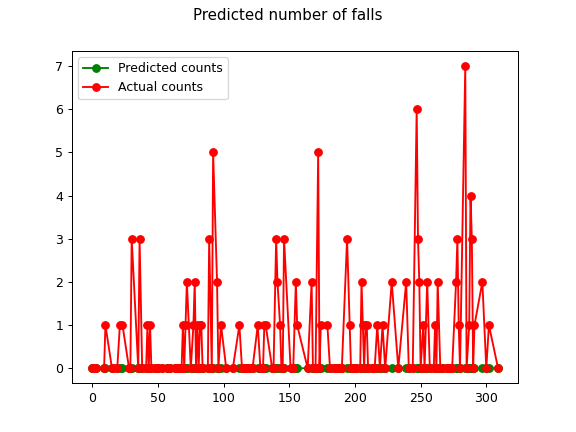

In [177]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_train['status']
fig = plt.figure()
fig.suptitle('Predicted number of falls')
predicted, = plt.plot(X_train.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_train.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<IPython.core.display.Javascript object>


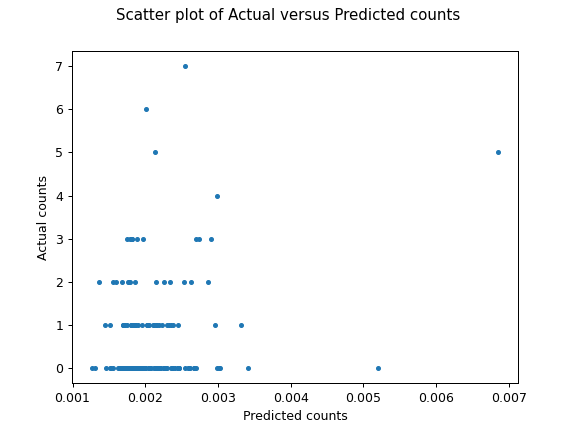

In [176]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

estimating alpha of binomial distribution

In [171]:
var_subjects3['BB_LAMBDA'] = poisson_training_results.mu
var_subjects3['AUX_OLS_DEP'] = var_subjects3.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/4152507412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects3['BB_LAMBDA'] = poisson_training_results.mu
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_10284/4152507412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects3['AUX_OLS_DEP'] = var_subjects3.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


<IPython.core.display.Javascript object>


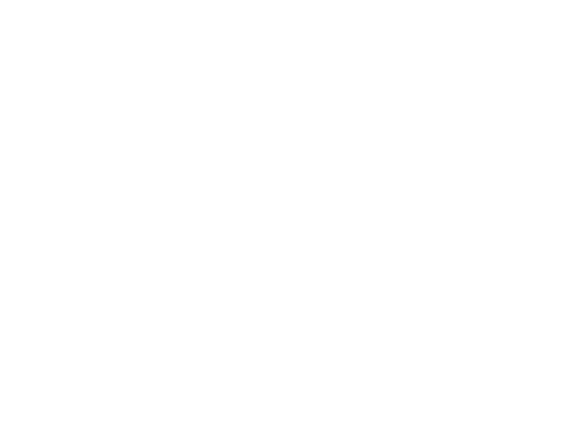

In [172]:
plt.figure()
plt.scatter(var_subjects3['BB_LAMBDA'],var_subjects3['status'])

In [173]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, var_subjects3).fit()

print(aux_olsr_results.params)

BB_LAMBDA    1.140234
dtype: float64


Bionomial distribution

In [174]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0]),exposure=var_subjects3["follow_up"].values).fit()
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  153
Model:                            GLM   Df Residuals:                      151
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.50
Date:                Fri, 06 May 2022   Deviance:                       138.79
Time:                        17:00:09   Pearson chi2:                     148.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02168
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9285      0.484    -14.318      0.0

In [178]:
poisson_predictions = nb2_training_results.get_prediction(X_train)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.001739  0.000306       0.001231       0.002455
1    0.001892  0.000277       0.001420       0.002519
2    0.002419  0.000367       0.001796       0.003257
3    0.001831  0.000286       0.001347       0.002488
9    0.002241  0.000299       0.001725       0.002912
..        ...       ...            ...            ...
291  0.001570  0.000349       0.001014       0.002428
297  0.001646  0.000329       0.001112       0.002436
300  0.002056  0.000268       0.001593       0.002655
302  0.001510  0.000365       0.000940       0.002427
309  0.001986  0.000268       0.001525       0.002587

[153 rows x 4 columns]


<IPython.core.display.Javascript object>


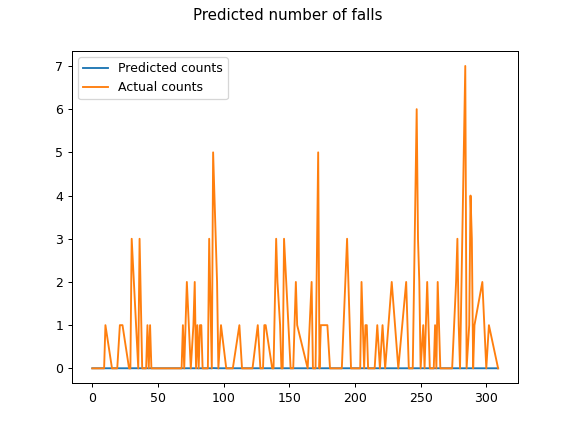

In [183]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_train['status']
fig = plt.figure()
fig.suptitle('Predicted number of falls')
predicted, = plt.plot(X_train.index, predicted_counts, label='Predicted counts')
actual, = plt.plot(X_train.index, actual_counts, label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

Analysis of variability while removing initiation and termination steps

In [184]:
direct_path="results"

files=[f for f in os.listdir(direct_path) if os.path.isfile(os.path.join(direct_path,f))]
result_list=[]

short=60

var_subjects=pd.DataFrame()
folders=analyzed_subject_info.folder_name.values

for i in range(0,len(analyzed_subject_info)):

        filepath=direct_path +"//" +folders[i]

        subj2_steps=np.load(filepath)
        var_s2_df,_=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                                                  longest_walkingbout=short,remove_step=2)
        
        var_s4_df,_=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                                          longest_walkingbout=short,remove_step=4)
        
        var_s6_df,_=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                                  longest_walkingbout=short,remove_step=6)
        
        var_s8_df,_=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                          longest_walkingbout=short,remove_step=8)
        
        var_st_df,_=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                  longest_walkingbout=short,remove_step=10)

        
        var_s2_df=var_s2_df.add_prefix('two_')
        
        var_s4_df=var_s4_df.add_prefix('four_')
        
        var_s6_df=var_s6_df.add_prefix('six_')
        
        var_s8_df=var_s8_df.add_prefix('eight_')
        
        var_st_df=var_st_df.add_prefix('ten_')
        
        if len(var_s2_df)>1:

            subj_df=pd.concat([var_s2_df.iloc[:,2:],var_s4_df.iloc[:,2:],var_s6_df.iloc[:,2:],var_s8_df.iloc[:,2:],var_st_df.iloc[:,2:]],axis=1)
    
            f=analyzed_subject_info.iloc[i,:].values

            subj_df["subject"]=f[0]
            subj_df["status"]=f[2]

            subj_df["follow_up_period"]=f[3]

            subj_df["Group_id"]=f[1]


            var_subjects=pd.concat([var_subjects,subj_df])
        else:
            print(f)

most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
no step time left
most strides have been filtered because of misdetection 
most strides have been filtered because of misdetection 
no step time left
most strides have been filtered because of misdetection 
['CLR160' 3 0 365 'CLR160_steps.npy']
most strides have been filtered because of misdetection 
no step time left
no step time left
no step time left
no step time left
no step time left
no step time left
['FSZ626' 2 0 365 'F

In [294]:
len(var_subjects[(var_subjects["Group_id"]==2)].subject.unique())

156

In [358]:
mid=400
long=10000


var_subjects_short=var_subjects.loc[(var_subjects["Group_id"]==2)]

var_subjects_short=var_subjects_short.loc[(var_subjects_short["two_N_steps"]>mid) & 
                                              (var_subjects_short["two_N_steps"]<long)]
var_subjects_short=var_subjects_short[["two_stridetime_Cov","four_stridetime_Cov","six_stridetime_Cov","eight_stridetime_Cov","ten_stridetime_Cov","subject","status","follow_up_period"]]
var_subjects_short=var_subjects_short.dropna() 
print(len(var_subjects_short.subject.unique()))

# print(var_subjects_short.mean())

# print(len(var_subjects_short))

var_subjects_short = var_subjects_short.astype(dtype= {"two_stridetime_Cov":"float64",
        "four_stridetime_Cov":"float64","six_stridetime_Cov":"float64","eight_stridetime_Cov":"float64","ten_stridetime_Cov":"float64"})

var_subjects_short.dtypes
var_subjects_short=var_subjects_short.groupby(["subject"],as_index=False).median()

114


In [359]:
expr = "status ~ ten_stridetime_Cov " #  + N_steps:Cov_all
y_train, X_train = dmatrices(expr, var_subjects_short, return_type='dataframe')
poisson_training_results = sm.GLM(y_train.values.astype("int64"), X_train, family=sm.families.Poisson(),exposure=var_subjects_short["follow_up_period"].values).fit()
# print(poisson_training_results.summary())
var_subjects_short['BB_LAMBDA'] = poisson_training_results.mu
var_subjects_short['AUX_OLS_DEP'] = var_subjects_short.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, var_subjects_short).fit()

print(aux_olsr_results.params)
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0]),exposure=var_subjects_short["follow_up_period"].values).fit()
print(nb2_training_results.summary())

BB_LAMBDA    1.02302
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  114
Model:                            GLM   Df Residuals:                      112
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.01
Date:                Fri, 06 May 2022   Deviance:                       103.81
Time:                        18:29:47   Pearson chi2:                     121.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05833
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------


Testing the prediction of the model

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.646375  0.105677       0.469159       0.890531
1    0.435400  0.120390       0.253237       0.748600
2    0.664938  0.105524       0.487189       0.907538
3    0.529002  0.112689       0.348444       0.803122
4    1.065286  0.210707       0.722943       1.569743
..        ...       ...            ...            ...
109  1.134485  0.245019       0.742953       1.732351
110  1.631295  0.555877       0.836524       3.181167
111  0.612994  0.106789       0.435682       0.862467
112  0.431773  0.120646       0.249697       0.746619
113  0.440360  0.120031       0.258102       0.751319

[114 rows x 4 columns]


<IPython.core.display.Javascript object>


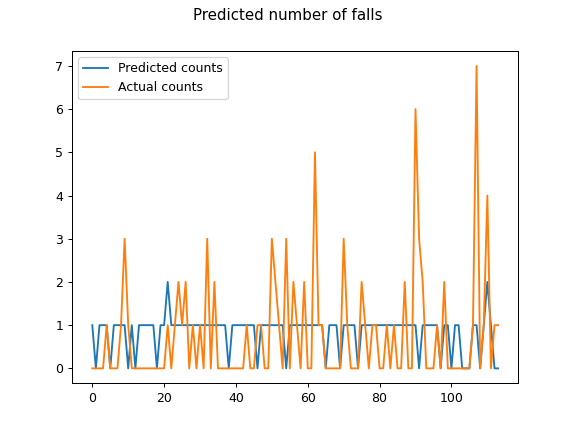

In [360]:
poisson_predictions = nb2_training_results.get_prediction(X_train,exposure=var_subjects_short["follow_up_period"].values)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)
predicted_counts=np.around(predictions_summary_frame['mean'])
actual_counts = y_train['status']

fig = plt.figure()
fig.suptitle('Predicted number of falls')
predicted, = plt.plot(X_train.index, predicted_counts, label='Predicted counts')
actual, = plt.plot(X_train.index, actual_counts, label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

Try logistic regression to acquire ROC curve

In [361]:
expr = "status ~ ten_stridetime_Cov " #  + N_steps:Cov_all
y_train, X_train = dmatrices(expr, var_subjects_short, return_type='dataframe')
poisson_training_results = sm.GLM(y_train.values.astype("int64"), X_train, family=sm.families.Poisson(),exposure=var_subjects_short["follow_up_period"].values).fit()
# print(poisson_training_results.summary())
var_subjects_short['BB_LAMBDA'] = poisson_training_results.mu
var_subjects_short['AUX_OLS_DEP'] = var_subjects_short.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, var_subjects_short).fit()

print(aux_olsr_results.params)
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0]),exposure=var_subjects_short["follow_up_period"].values).fit()
print(nb2_training_results.summary())

BB_LAMBDA    1.02302
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  114
Model:                            GLM   Df Residuals:                      112
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.01
Date:                Fri, 06 May 2022   Deviance:                       103.81
Time:                        18:29:49   Pearson chi2:                     121.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05833
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------


In [364]:
expr = "status ~ ten_stridetime_Cov " #  + N_steps:Cov_all
y_train, X_train = dmatrices(expr, var_subjects_short, return_type='dataframe')
y_train[y_train["status"]>0]=1

log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())
yhat = log_reg.predict(X_train)
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
# print('Actual values', list(y_train.values))
# print('Predictions :', prediction)

from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y_train, prediction)
print ("Confusion Matrix : \n", cm)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('specificity = ', specificity)

sensitivity = tp / (tp+fn)
print('sensitivity = ', sensitivity)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediction))

Optimization terminated successfully.
         Current function value: 0.645244
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  114
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 May 2022   Pseudo R-squ.:                 0.04325
Time:                        18:35:36   Log-Likelihood:                -73.558
converged:                       True   LL-Null:                       -76.883
Covariance Type:            nonrobust   LLR p-value:                  0.009917
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9605      0.665     -2.947      0.003      -3.264      -0.657
ten_s

<IPython.core.display.Javascript object>


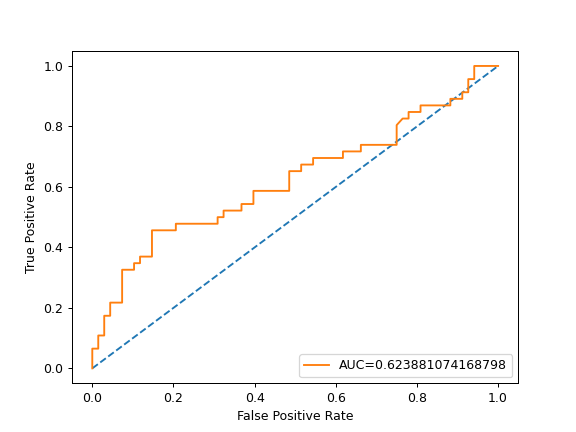

In [363]:
from sklearn import metrics
import scikitplot as skplt
y_train_=y_train.astype("int64").values


#create ROC curve
plt.figure()

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fpr, tpr, _ = metrics.roc_curve(y_train_, yhat)
auc = metrics.roc_auc_score(y_train_, yhat)

x = np.linspace(0, 1, 10)
plt.plot(x, x, linestyle='--') # dashed

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [270]:
# skplt.metrics.plot_roc_curve(y_train.values, prediction)

C:\Users\al-abiad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [219]:
expr = "status ~ eight_stridetime_Cov " #  + N_steps:Cov_all
y_train, X_train = dmatrices(expr, var_subjects_short, return_type='dataframe')
poisson_training_results = sm.GLM(y_train.values.astype("int64"), X_train, family=sm.families.Poisson()).fit()
# print(poisson_training_results.summary())
var_subjects_short['BB_LAMBDA'] = poisson_training_results.mu
var_subjects_short['AUX_OLS_DEP'] = var_subjects_short.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, var_subjects_short).fit()

print(aux_olsr_results.params)
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())

BB_LAMBDA    1.100031
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  114
Model:                            GLM   Df Residuals:                      112
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.95
Date:                Fri, 06 May 2022   Deviance:                       103.20
Time:                        17:24:17   Pearson chi2:                     117.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05934
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [45]:
direct_path="results"

files=[f for f in os.listdir(direct_path) if os.path.isfile(os.path.join(direct_path,f))]
result_list=[]

short=60

var_subjects=pd.DataFrame()
for f in files:
    if f.endswith(".npy"):

        filepath=direct_path +"//" +f

        subj2_steps=np.load(filepath)
        var_s2_df,stride_s2_df=calculate_variability_activeperiod(subj2_steps,minimum_seperationwalkingbout=200,
                                                                  longest_walkingbout=short)

        
        if len(var_s2_df)>10:
            subject_file=f[:-10]


            subj_df=var_s2_df.iloc[:,2:]
            subj_df["subject"]=subject_file



            f=analyzed_subject_info.loc[analyzed_subject_info['subject_id']==subject_file.replace(" ", "")].values

            if len(f)>0:

                subj_df["status"]=f[0][2]

                subj_df["follow_up_period"]=f[0][3]
                
                subj_df["Group_id"]=f[0][1]


            var_subjects=pd.concat([var_subjects,subj_df])
        else:
            print(f)

most strides have been filtered because of misdetection 
problem with analysis
most strides have been filtered because of misdetection 
problem with analysis
CMF 148_steps.npy
DFG537_steps.npy
DFO419_steps.npy
DHK965_steps.npy
FTV721_steps.npy
no step time left
most strides have been filtered because of misdetection 
problem with analysis
no step time left
JDT236_steps.npy
LIZ332_steps.npy
MFY539_steps.npy
NPD319_steps.npy


In [95]:
var_subjects

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,880,0.038,4.463,0.020,4.639,ZVT514,0,104,3.0
0,280,0.007,0.904,0.006,1.526,ZVT514,0,104,3.0
0,3070,0.053,6.143,0.029,6.681,ZVT514,0,104,3.0
0,680,0.120,13.393,0.047,11.487,ZVT514,0,104,3.0


In [96]:
var_subjects=var_subjects.dropna()
var_subjects=var_subjects.astype(dtype= {"N_steps":"int64","stridetime_std":"float64","stridetime_Cov":"float64","steptime_std":"float64","steptime_Cov":"float64","status":"int32","follow_up_period":"int64"})

In [97]:
var_subjects["N_steps"]=var_subjects["N_steps"].round(-1)

In [98]:
var_subjects_gr2=var_subjects[(var_subjects["Group_id"]==2)]

In [99]:
var_subjects_gr2

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0


In [70]:
long=50
thresh_subject=[]
for long in range(60,1000,50):

    thresh_subject.append([len(var_subjects_gr2[(var_subjects_gr2["N_steps"]>long)&(var_subjects_gr2["status"]==0)].subject.unique()),len(var_subjects_gr2[(var_subjects_gr2["N_steps"]>long)&(var_subjects_gr2["status"]>0)].subject.unique()),long])
thresh_subject=pd.DataFrame(data=thresh_subject,columns=["non_faller","faller","threshold"])

<IPython.core.display.Javascript object>


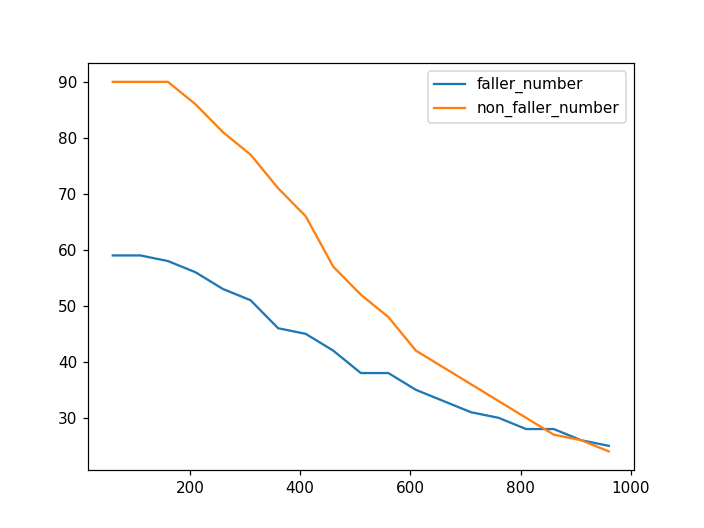

In [71]:
plt.figure()
plt.plot(thresh_subject["threshold"],thresh_subject["faller"],label="faller_number")
plt.plot(thresh_subject["threshold"],thresh_subject["non_faller"],label="non_faller_number")
plt.legend()

In [92]:
thresh_subject

,non_faller,faller,threshold
0,90,59,60
1,90,59,110
2,90,58,160
3,86,56,210
4,81,53,260
5,77,51,310
6,71,46,360
7,66,45,410
8,57,42,460
9,52,38,510


In [103]:
var_subjects_gr2=var_subjects_gr2[var_subjects_gr2["N_steps"]>0]

In [105]:
var_subjects_gr2

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0


<IPython.core.display.Javascript object>


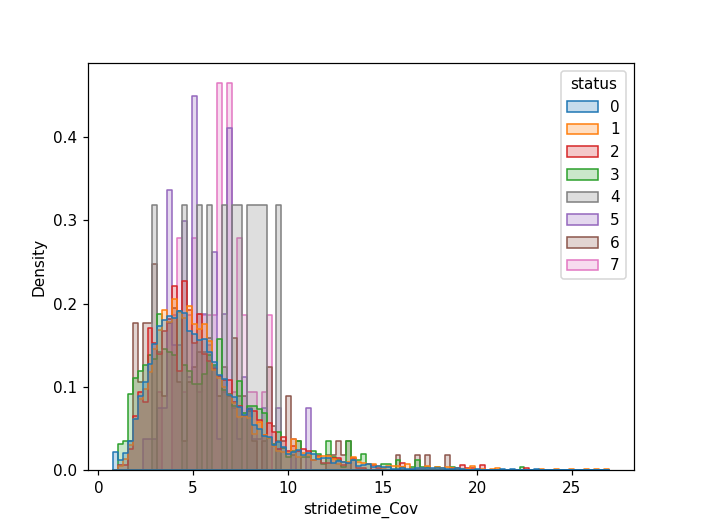

<AxesSubplot:xlabel='stridetime_Cov', ylabel='Density'>

In [106]:
plt.figure()

unique = var_subjects_gr2["status"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=var_subjects_gr2, x="stridetime_Cov",hue="status", element="step", palette=palette, stat="density",common_norm=False)

In [107]:
var_subjects_gr2.skew() # to check for normality

C:\Users\al-abiad\AppData\Local\Temp/ipykernel_26700/3010543408.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_subjects_gr2.skew() # to check for normality


N_steps             11.255501
stridetime_std       1.506704
stridetime_Cov       1.672700
steptime_std         1.130450
steptime_Cov         1.318303
status               2.191131
follow_up_period    -5.209312
Group_id             0.000000
dtype: float64

Transforming variables into normal distribution

<IPython.core.display.Javascript object>


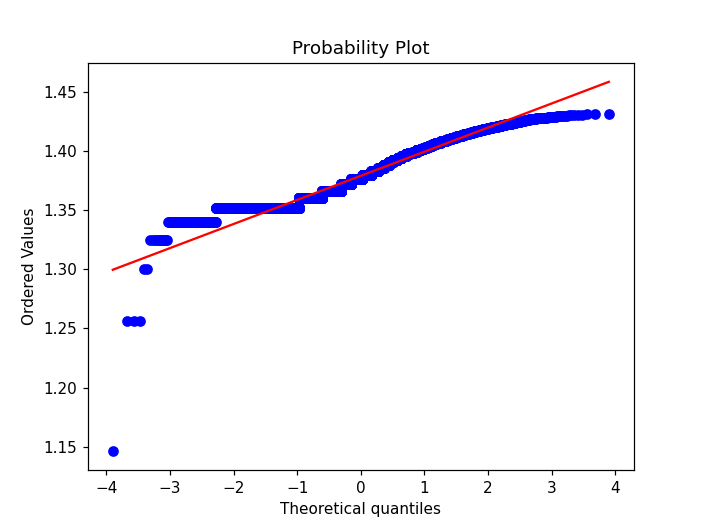

((array([-3.89999508, -3.67971335, -3.5589957 , ...,  3.5589957 ,
          3.67971335,  3.89999508]),
  array([1.1460091 , 1.25631409, 1.25631409, ..., 1.43074341, 1.43093627,
         1.43093885])),
 (0.020351339167885073, 1.3788494222586403, 0.978276287917561))

In [161]:
import scipy.stats as stats
import pylab


# x,t=stats.boxcox(var_subjects_gr2['N_steps'].values)
var_subjects_gr2['N_steps']=np.log(var_subjects_gr2['N_steps'].values)

# var_subjects_gr2['N_steps']=x

plt.figure()
stats.probplot(x,plot=pylab)

<IPython.core.display.Javascript object>


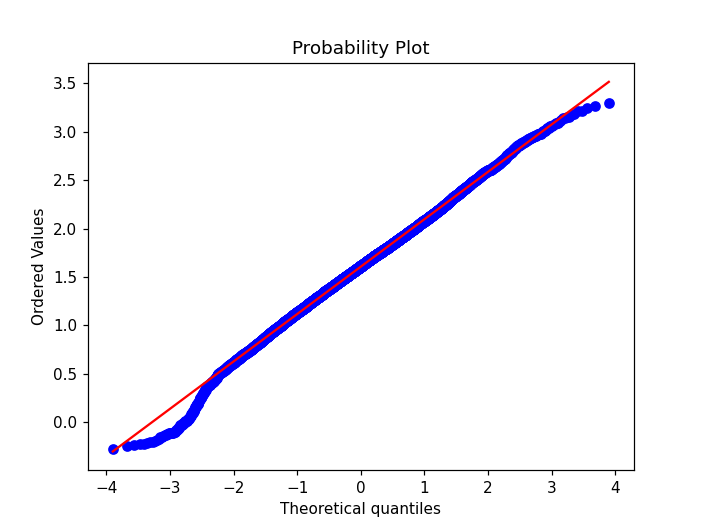

((array([-3.89999508, -3.67971335, -3.5589957 , ...,  3.5589957 ,
          3.67971335,  3.89999508]),
  array([-0.27839203, -0.24590054, -0.24079849, ...,  3.25064577,
          3.26793262,  3.29416881])),
 (0.48993122641785214, 1.6060564810688591, 0.9990829461678392))

In [163]:
import scipy.stats as stats
import pylab

var_subjects_gr2['stridetime_Cov']=np.log(var_subjects_gr2['stridetime_Cov'].values)

plt.figure()
stats.probplot(var_subjects_gr2['stridetime_Cov'].values,plot=pylab)

<IPython.core.display.Javascript object>


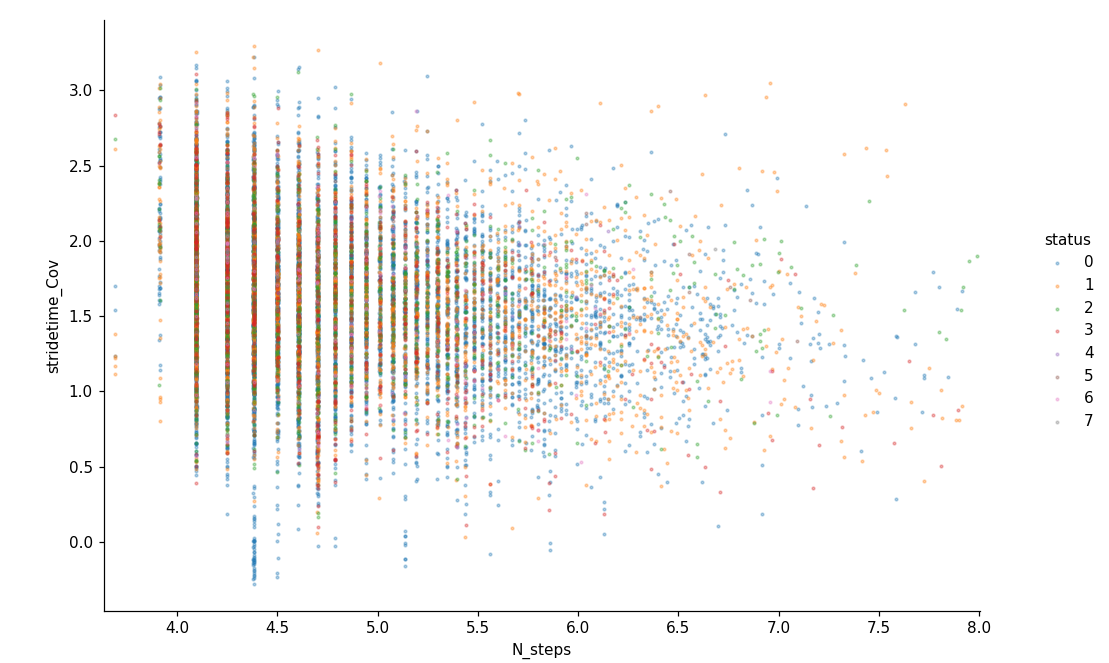

In [164]:


sns.lmplot(data = var_subjects_gr2, x = 'N_steps',hue="status", y = 'stridetime_Cov', fit_reg = False,
            x_jitter = 0.002, y_jitter = 0.002,scatter_kws = {'alpha' : 1/3,'s':3})

In [165]:
pg.corr(x=var_subjects_gr2['N_steps'], y=var_subjects_gr2['stridetime_Cov']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,14411,-0.214,"[-0.23, -0.2]",0.0,3.286e+144,1.0


                r    dof      pval           CI95%     power
rm_corr -0.025759  14262  0.002093  [-0.04, -0.01]  0.868001


<IPython.core.display.Javascript object>


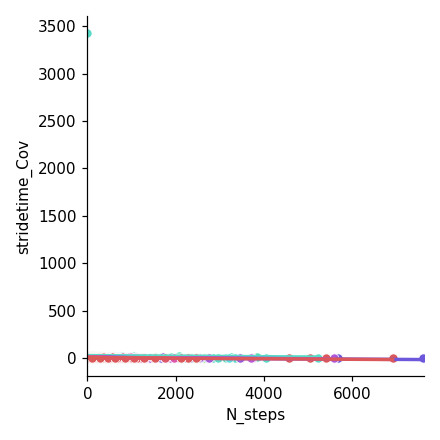

In [185]:
import pingouin as pg

print(pg.rm_corr(data=var_subjects_gr2, x='N_steps', y='stridetime_Cov', subject='subject'))

g = pg.plot_rm_corr(data=var_subjects_gr2, x='N_steps', y='stridetime_Cov', subject='subject')

Applying Mixed linear model regression

In [186]:
md = smf.mixedlm("stridetime_Cov ~ N_steps", var_subjects_gr2, groups=var_subjects_gr2["subject"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    stridetime_Cov
No. Observations:    14412      Method:                REML          
No. Groups:          149        Scale:                 815.1526      
Min. group size:     12         Log-Likelihood:        inf           
Max. group size:     319        Converged:             Yes           
Mean group size:     96.7                                            
---------------------------------------------------------------------
          Coef.    Std.Err.     z    P>|z|     [0.025       0.975]   
---------------------------------------------------------------------
Intercept -0.000 10677545.242 -0.000 1.000 -20927604.117 20927604.117
N_steps   -0.003        0.001 -3.093 0.002        -0.005       -0.001
Group Var  0.000                                                     



C:\Users\al-abiad\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\al-abiad\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\al-abiad\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\al-abiad\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
C:\Users\al-abiad\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the e

<IPython.core.display.Javascript object>


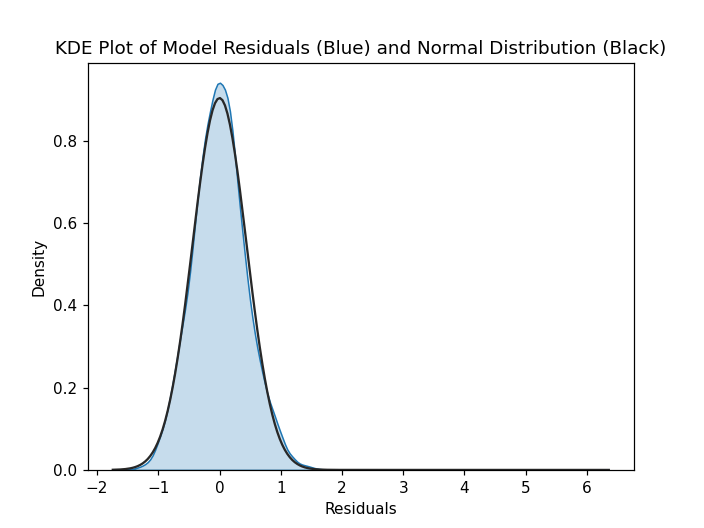

C:\Users\al-abiad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


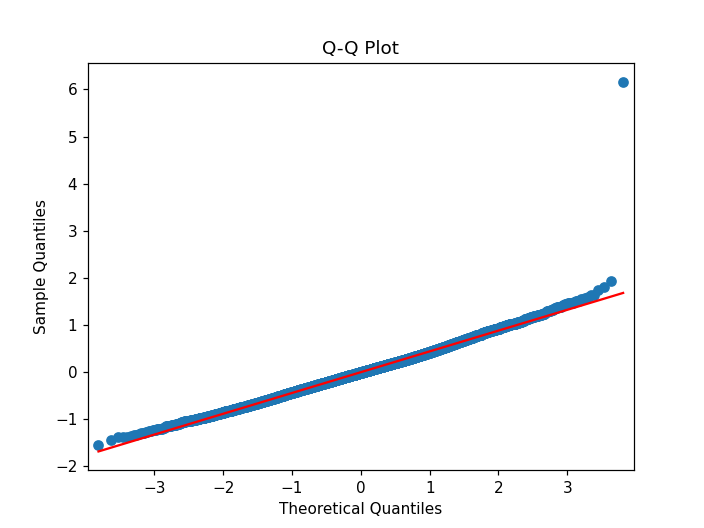

<IPython.core.display.Javascript object>


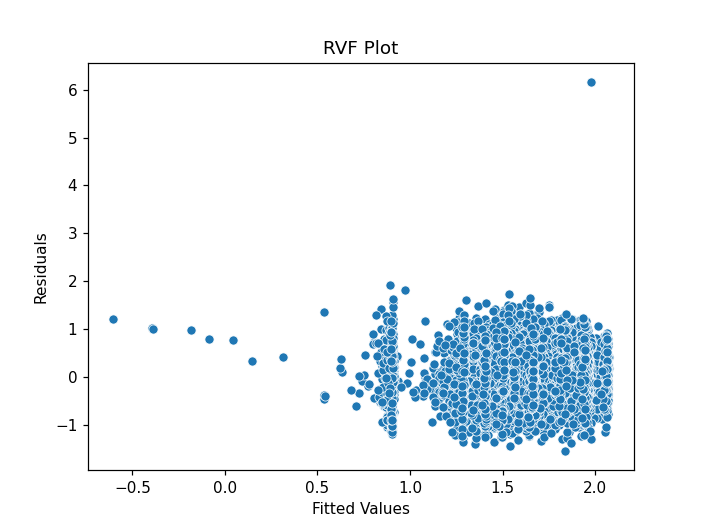

Text(0, 0.5, 'Residuals')

In [59]:
fig = plt.figure()

ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")


## Q-Q PLot

fig = plt.figure()
ax = fig.add_subplot(111)

sm.qqplot(mdf.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

fig = plt.figure()

ax = sns.scatterplot(y = mdf.resid, x = mdf.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

In [108]:
var_subjects_gr2

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0


In [109]:
var_subjects_gr2.dropna() 

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0


In [187]:
var_subjects_gr2_med=pd.DataFrame()
var_subjects_gr2_med['stridetime_Cov']=var_subjects_gr2.groupby(['subject'])['stridetime_Cov'].median().values#.round(decimals=3)
var_subjects_gr2_med['status']=var_subjects_gr2.groupby(['subject'])['status'].median().values.astype('int')

In [188]:
var_subjects_gr2_med

,stridetime_Cov,status
0,4.016,0
1,4.584,0
2,6.140,0
3,4.321,0
4,6.010,0
...,...,...
144,3.455,1
145,3.956,2
146,5.330,0
147,3.012,1


<IPython.core.display.Javascript object>


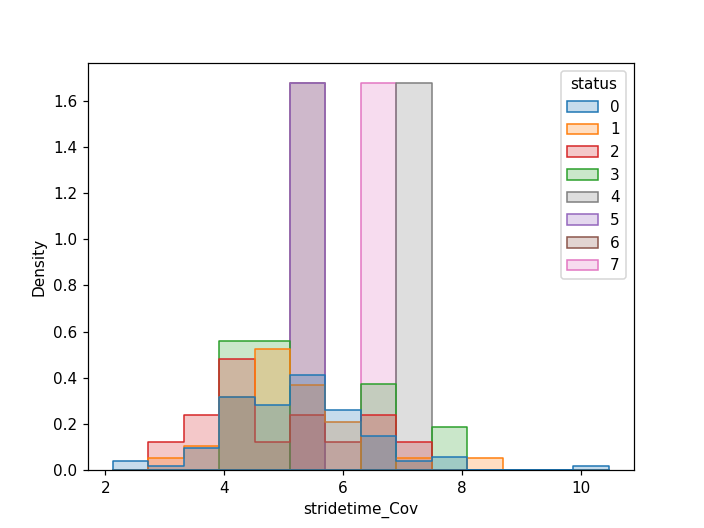

<AxesSubplot:xlabel='stridetime_Cov', ylabel='Density'>

In [189]:
plt.figure()

unique = var_subjects_gr2["status"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=var_subjects_gr2_med, x="stridetime_Cov",hue="status", element="step", palette=palette, stat="density",common_norm=False)

In [136]:
expr = "status ~ stridetime_Cov + N_steps"
y_train, X_train = dmatrices(expr, var_subjects_gr2, return_type='dataframe')

In [137]:
X_train

,Intercept,stridetime_Cov,N_steps
0,1.0,6.912,240.0
0,1.0,4.544,80.0
0,1.0,2.645,80.0
0,1.0,3.197,70.0
0,1.0,2.864,70.0
...,...,...,...
0,1.0,3.353,280.0
0,1.0,6.565,60.0
0,1.0,5.452,60.0
0,1.0,4.826,80.0


In [138]:
y_train

,status
0,0.0
0,0.0
0,0.0
0,0.0
0,0.0
...,...
0,0.0
0,0.0
0,0.0
0,0.0


In [139]:
poisson_training_results = sm.GLM( y_train, X_train, family=sm.families.Poisson()).fit()

In [140]:

print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                14411
Model:                            GLM   Df Residuals:                    14408
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19096.
Date:                Wed, 04 May 2022   Deviance:                       23005.
Time:                        18:29:45   Pearson chi2:                 2.68e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002480
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3211      0.021    -15.

In [141]:
poisson_training_results.mu
print(len(poisson_training_results.mu))

14411


In [142]:
#we find that the model doesn't fit

In [143]:
var_subjects_gr2['BB_LAMBDA'] = poisson_training_results.mu
var_subjects_gr2['AUX_OLS_DEP'] = var_subjects_gr2.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

C:\Users\al-abiad\AppData\Local\Temp/ipykernel_26700/1630932880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects_gr2['BB_LAMBDA'] = poisson_training_results.mu
C:\Users\al-abiad\AppData\Local\Temp/ipykernel_26700/1630932880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_subjects_gr2['AUX_OLS_DEP'] = var_subjects_gr2.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


In [144]:
var_subjects_gr2

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id,BB_LAMBDA,AUX_OLS_DEP
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0,0.817838,-0.182162
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0,0.775823,-0.224177
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0,0.758090,-0.241910
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0,0.762063,-0.237937
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0,0.758979,-0.241021
...,...,...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0,0.787848,-0.212152
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0,0.792780,-0.207220
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0,0.782108,-0.217892
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0,0.778492,-0.221508


In [145]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""


aux_olsr_results = smf.ols(ols_expr, var_subjects_gr2).fit()

print(aux_olsr_results.params)
print(aux_olsr_results.tvalues)

BB_LAMBDA    1.071501
dtype: float64
BB_LAMBDA    19.636548
dtype: float64


In [146]:
aux_olsr_results.params[0]

1.071500518869227

In [147]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                14411
Model:                            GLM   Df Residuals:                    14408
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17785.
Date:                Wed, 04 May 2022   Deviance:                       13338.
Time:                        18:29:55   Pearson chi2:                 1.45e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001387
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3275      0.029    -11.

In [202]:
var_subjects_gr2

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period,Group_id
0,240,0.086,6.912,0.053,8.431,ABJ828,0,365,2.0
0,80,0.047,4.544,0.026,5.095,ABJ828,0,365,2.0
0,80,0.027,2.645,0.019,3.625,ABJ828,0,365,2.0
0,70,0.034,3.197,0.022,4.155,ABJ828,0,365,2.0
0,70,0.030,2.864,0.017,3.290,ABJ828,0,365,2.0
...,...,...,...,...,...,...,...,...,...
0,280,0.042,3.353,0.048,7.556,ZPG674,0,365,2.0
0,60,0.090,6.565,0.067,9.774,ZPG674,0,365,2.0
0,60,0.075,5.452,0.075,10.905,ZPG674,0,365,2.0
0,80,0.068,4.826,0.069,9.798,ZPG674,0,365,2.0


In [126]:
area_variability=[]
for s in var_subjects_gr2.subject.unique():
    
    subject1=var_subjects_gr2[(var_subjects_gr2["subject"]==s)]
    
    max_stride=subject1.groupby('N_steps').max()
    
    x=max_stride.index
    y=max_stride["stridetime_Cov"]

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    xp = np.linspace(60, 400, 100)
    
    area=np.trapz(p(xp), x=xp)/340
    
    area_variability.append([z[0],z[1],area,subject1["status"].values[0]])
    

<IPython.core.display.Javascript object>


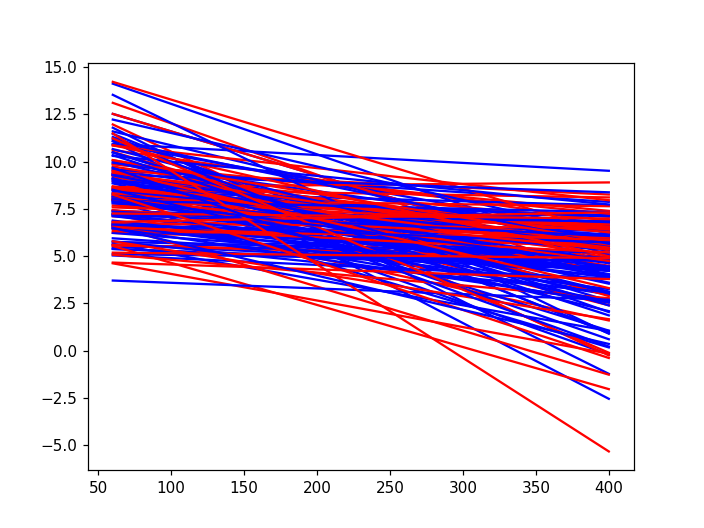

In [127]:
poly_area=pd.DataFrame(data=area_variability,columns=["a","b","area","status"])

# poly_area.loc[(poly_area["status"]>3),"status"]=4

# gr=poly_area.groupby('status').mean()

xp = np.linspace(60, 400, 100)
plt.figure()
for i in range(0,len(poly_area)):
    p = np.poly1d(poly_area.iloc[i,:2].values)  
    
    if poly_area["status"].values[i]==0:

        plt.plot( xp, p(xp), '-',c='b')
    else:
        plt.plot( xp, p(xp), '-',c='r')
        

<IPython.core.display.Javascript object>


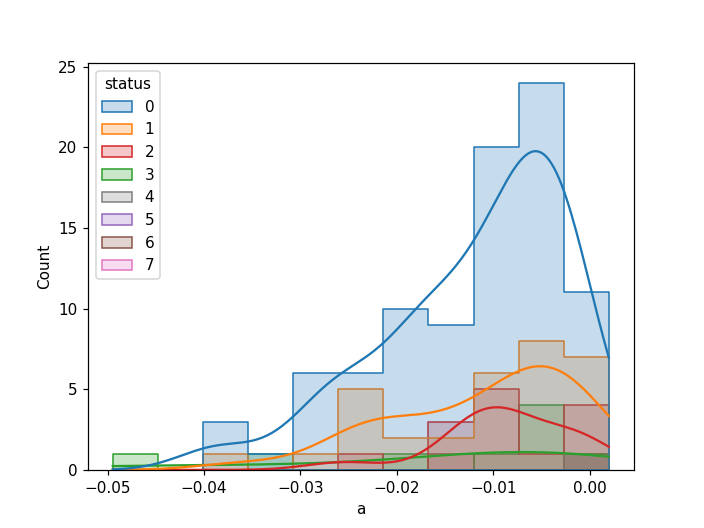

C:\Users\al-abiad\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='a', ylabel='Count'>

In [148]:
plt.figure()

unique = poly_area["status"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=poly_area, x="a",hue="status", element="step", kde=True,palette=palette)

In [149]:
expr = "status ~ a"
y_train, X_train = dmatrices(expr, poly_area, return_type='dataframe')

In [150]:
X_train

,Intercept,a
0,1.0,-0.003820
1,1.0,-0.018320
2,1.0,-0.018484
3,1.0,-0.005416
4,1.0,-0.002607
...,...,...
144,1.0,-0.002568
145,1.0,-0.025406
146,1.0,-0.027796
147,1.0,-0.000840


In [151]:
poisson_training_results = sm.GLM( y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  149
Model:                            GLM   Df Residuals:                      147
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.83
Date:                Wed, 04 May 2022   Deviance:                       239.93
Time:                        18:30:54   Pearson chi2:                     289.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01522
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1429      0.145     -0.987      0.3

In [152]:
poly_area['BB_LAMBDA'] = poisson_training_results.mu
poly_area['AUX_OLS_DEP'] = poly_area.apply(lambda x: ((x['status'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

In [153]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""


aux_olsr_results = smf.ols(ols_expr, poly_area).fit()

print(aux_olsr_results.params)
print(aux_olsr_results.tvalues)

BB_LAMBDA    1.279619
dtype: float64
BB_LAMBDA    2.128819
dtype: float64


In [154]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  149
Model:                            GLM   Df Residuals:                      147
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -174.75
Date:                Wed, 04 May 2022   Deviance:                       133.41
Time:                        18:30:57   Pearson chi2:                     149.
No. Iterations:                     7   Pseudo R-squ. (CS):           0.006780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1705      0.204     -0.834      0.4

In [135]:
from scipy import stats

faller=poly_area.loc[(poly_area["status"]>0),"area"]

nonfaller=poly_area.loc[(poly_area["status"]==0),"area"]

stats.ttest_ind(faller, nonfaller)

Ttest_indResult(statistic=0.9740842023234441, pvalue=0.3316149189604327)

In [122]:
var_subjects.loc[(var_subjects["status"]>0),"status"]=1

<IPython.core.display.Javascript object>


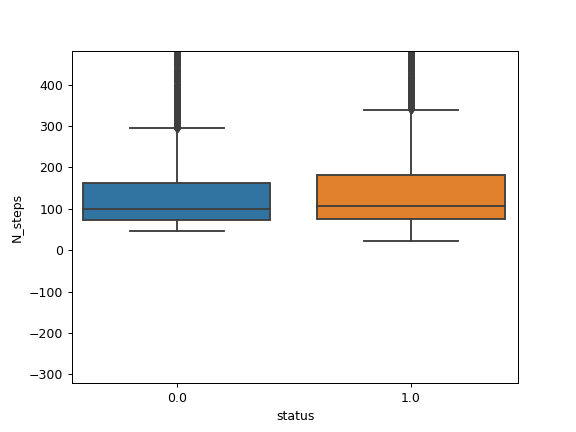

<IPython.core.display.Javascript object>


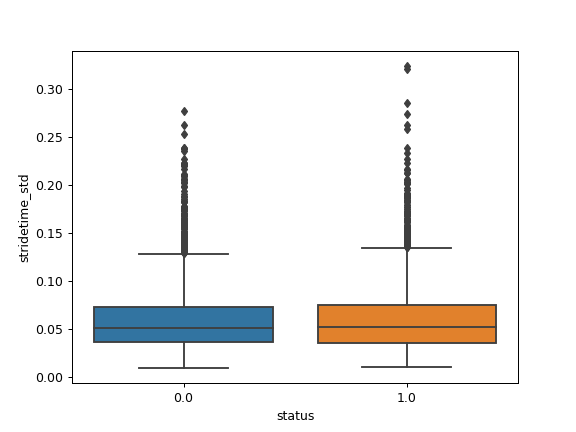

<IPython.core.display.Javascript object>


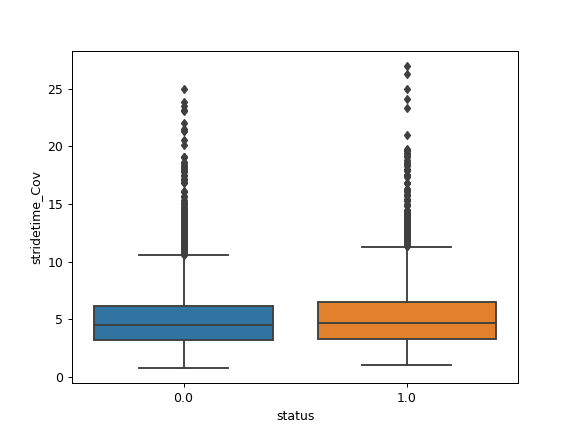

<IPython.core.display.Javascript object>


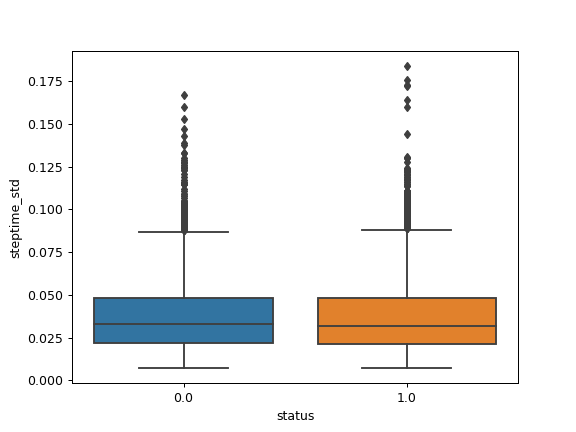

<IPython.core.display.Javascript object>


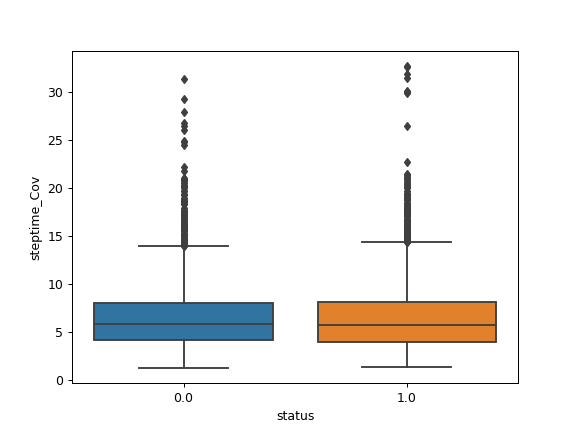

<IPython.core.display.Javascript object>


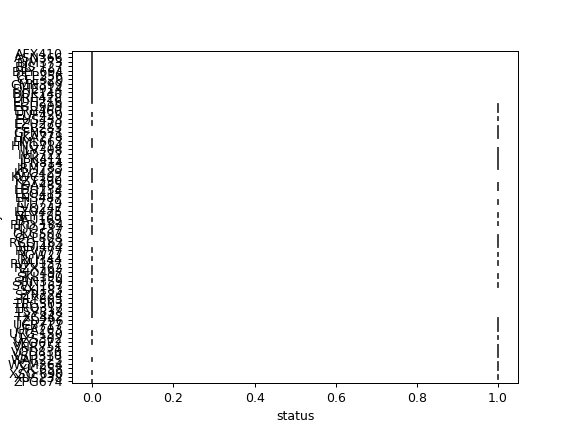

In [123]:
for c in var_subjects.columns[:-3]:
    plt.figure()
    sns.boxplot(x="status", y=c,
                     data=var_subjects)

<IPython.core.display.Javascript object>


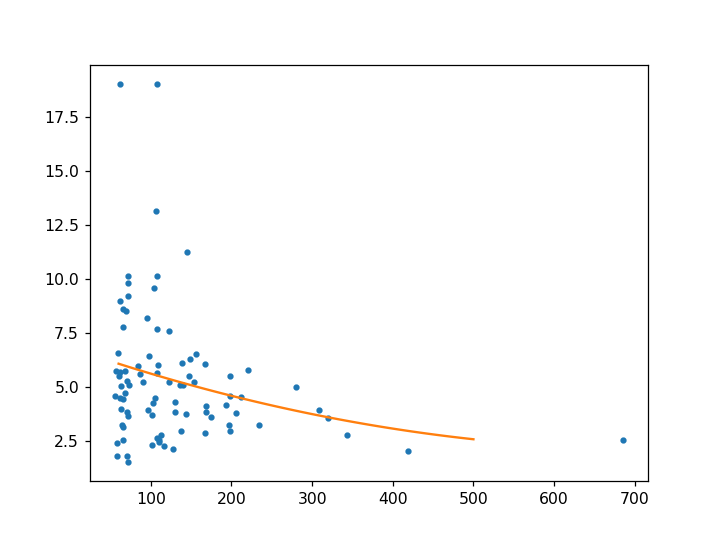

array([ 8.86867599e-06, -1.29222930e-02,  6.82800150e+00])

In [126]:

# max_stride=subject1.groupby('N_steps').max()

x=subject1.N_steps.values.astype("int64")
y=subject1.stridetime_Cov.values.astype("float64")

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

xp = np.linspace(60, 500, 100)
plt.figure()
plt.plot(x, y, '.', xp, p(xp), '-')

# x=max_stride.index
# y=max_stride["stridetime_Cov"]

# z = np.polyfit(x, y, 2)
# p = np.poly1d(z)

# xp = np.linspace(60, 500, 100)
# plt.figure()
# plt.plot(x, y, '.', xp, p(xp), '-')
z

In [87]:
var_subjects=var_subjects[(var_subjects["subject"]!="ILU2040") & (var_subjects["subject"]!="PAU1692") & (var_subjects["subject"]!="TUQ859")& (var_subjects["subject"]!="ZNU138") ].reset_index(drop=True)

In [88]:
var_subjects

,N_steps,stridetime_std,stridetime_Cov,steptime_std,steptime_Cov,subject,status,follow_up_period
0,62,0.098,8.973,0.06,10.927,AFX410,0.0,365.0
1,105,0.049,4.505,0.029,5.251,AFX410,0.0,365.0
2,110,0.026,2.462,0.018,3.369,AFX410,0.0,365.0
3,66,0.093,8.637,0.045,8.386,AFX410,0.0,365.0
4,65,0.026,2.549,0.013,2.525,AFX410,0.0,365.0
...,...,...,...,...,...,...,...,...
17788,884,0.038,4.463,0.02,4.639,ZVT514,0.0,104.0
17789,281,0.007,0.904,0.006,1.526,ZVT514,0.0,104.0
17790,3074,0.053,6.143,0.029,6.681,ZVT514,0.0,104.0
17791,684,0.12,13.393,0.047,11.487,ZVT514,0.0,104.0


<IPython.core.display.Javascript object>


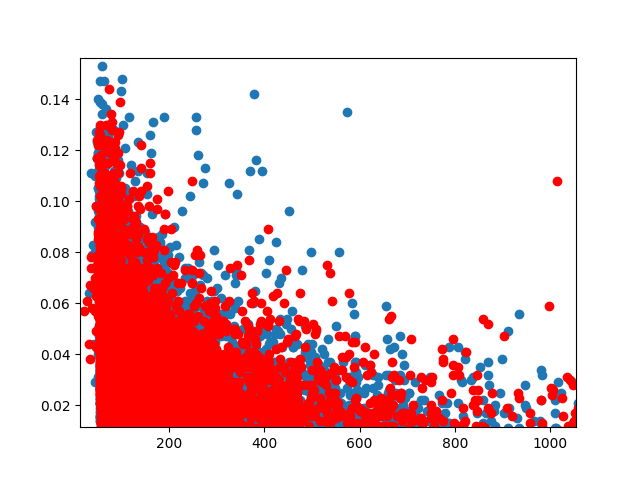

In [94]:
plt.figure()
plt.scatter(var_subjects.loc[(var_subjects["status"]==0),"N_steps"].values,var_subjects.loc[(var_subjects["status"]==0),"steptime_std"].values)

plt.scatter(var_subjects.loc[(var_subjects["status"]>0),"N_steps"].values,var_subjects.loc[(var_subjects["status"]>0),"steptime_std"].values,c='r')


Remove 
ILU2040
PAU1692
TUQ859

In [17]:
result=result[(result["subject"]!="ILU2040") & (result["subject"]!="PAU1692") & (result["subject"]!="TUQ859")& (result["subject"]!="ZNU138") ].reset_index(drop=True)

In [18]:
analyzed_subject_info

,subject_id,nb_falls,follow_up
0,AFX410,0,365
1,AKJ742,0,365
2,AQX395,0,365
3,ARY387,0,107
4,ASN366,0,365
...,...,...,...
159,YSZ293,1,365
160,ZDG461,0,365
161,ZIO230,0,365
162,ZPG674,0,365


In [57]:
result_analyzed=pd.concat([result, analyzed_subject_info.iloc[:,1:3]], axis=1)

In [35]:
result_analyzed=result_analyzed[(result_analyzed["nb_falls"]<=4)].reset_index(drop=True)

In [36]:
result_analyzed.loc[(result_analyzed["nb_falls"]>1),"nb_falls"]=1

In [37]:
result_analyzed

,subject,No. bouts,No. steps,short percen,med percen,long percen,SD short,SD med,SD long,Cov short,Cov med,Cov long,nb_falls,follow_up
0,AFX410,87,11374,41.379310,47.126437,11.494253,0.0585,0.0470,0.0390,5.2770,4.5050,3.6925,0,365
1,AKJ742,20,2130,65.000000,25.000000,10.000000,0.0440,0.0470,0.0395,3.5700,3.6930,3.2375,0,365
2,AQX395,94,17336,39.361702,36.170213,24.468085,0.0570,0.0480,0.0420,5.4880,4.5040,4.3550,0,365
3,ARY387,36,3990,55.555556,36.111111,8.333333,0.0785,0.0610,0.0330,7.0370,5.2950,3.2520,0,107
4,ASN366,96,12052,53.125000,32.291667,13.541667,0.0530,0.0370,0.0370,4.6450,3.3460,3.7950,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,YSZ293,58,9298,43.103448,31.034483,25.862069,0.0660,0.0455,0.0360,6.4180,4.4055,3.5530,1,365
157,ZDG461,206,38511,36.893204,29.126214,33.980583,0.0475,0.0480,0.0320,4.8140,4.8695,3.5295,0,365
158,ZIO230,47,4044,80.851064,17.021277,2.127660,0.0715,0.0640,0.0580,6.1345,6.0020,5.1050,0,365
159,ZPG674,37,3013,89.189189,8.108108,2.702703,0.0660,0.0580,0.0420,4.8260,4.2470,3.3530,0,365


<IPython.core.display.Javascript object>


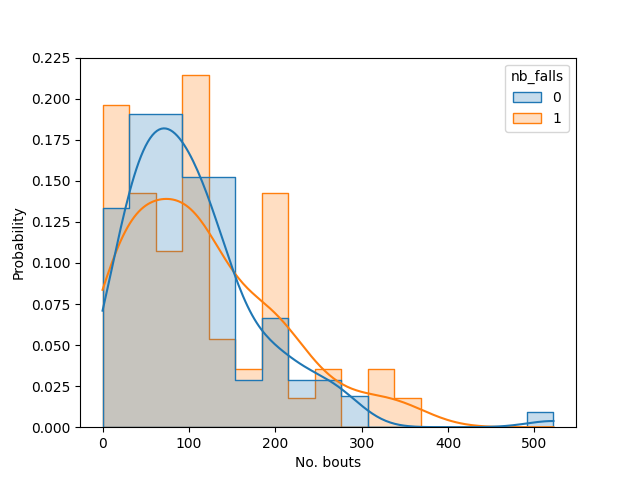

<AxesSubplot:xlabel='No. bouts', ylabel='Probability'>

In [38]:
plt.figure()
unique = result_analyzed["nb_falls"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=result_analyzed, x="No. bouts",hue="nb_falls", element="step", kde=True, palette=palette, stat="probability",common_norm=False)

<IPython.core.display.Javascript object>


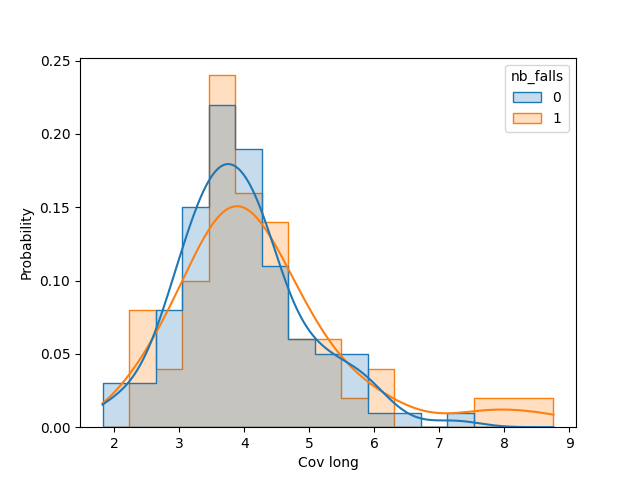

<AxesSubplot:xlabel='Cov long', ylabel='Probability'>

In [39]:
plt.figure()
unique = result_analyzed["nb_falls"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=result_analyzed, x="Cov long",hue="nb_falls", element="step", kde=True, palette=palette,stat="probability",common_norm=False)

<IPython.core.display.Javascript object>


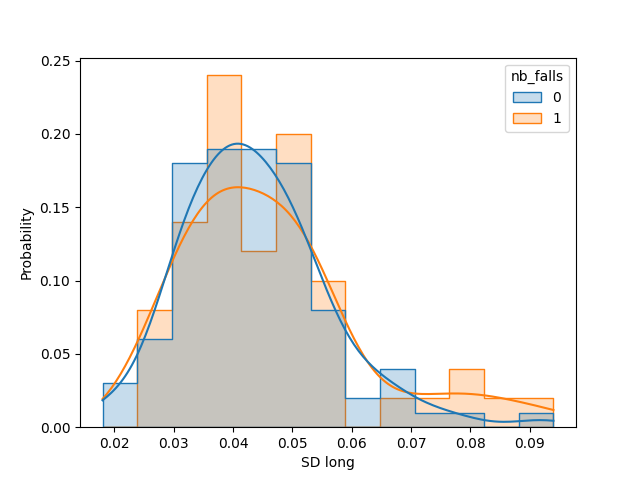

<AxesSubplot:xlabel='SD long', ylabel='Probability'>

In [40]:
plt.figure()
unique = result_analyzed["nb_falls"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=result_analyzed, x="SD long",hue="nb_falls", element="step", kde=True, palette=palette,stat="probability",common_norm=False)

<IPython.core.display.Javascript object>


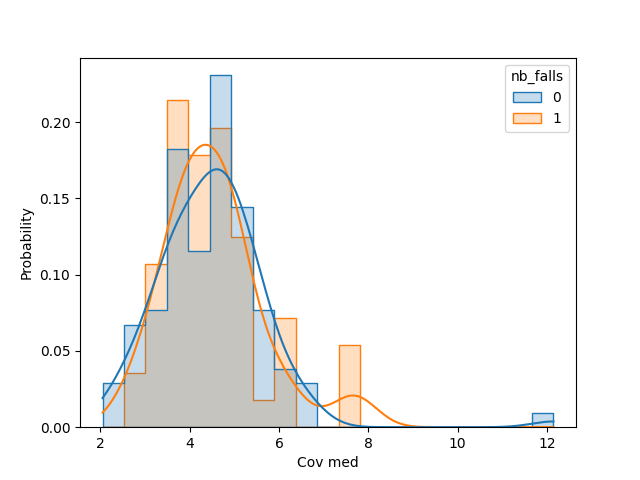

<AxesSubplot:xlabel='Cov med', ylabel='Probability'>

In [41]:
plt.figure()
unique = result_analyzed["nb_falls"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.histplot(data=result_analyzed, x="Cov med",hue="nb_falls", element="step", kde=True, palette=palette,stat="probability",common_norm=False)

<IPython.core.display.Javascript object>


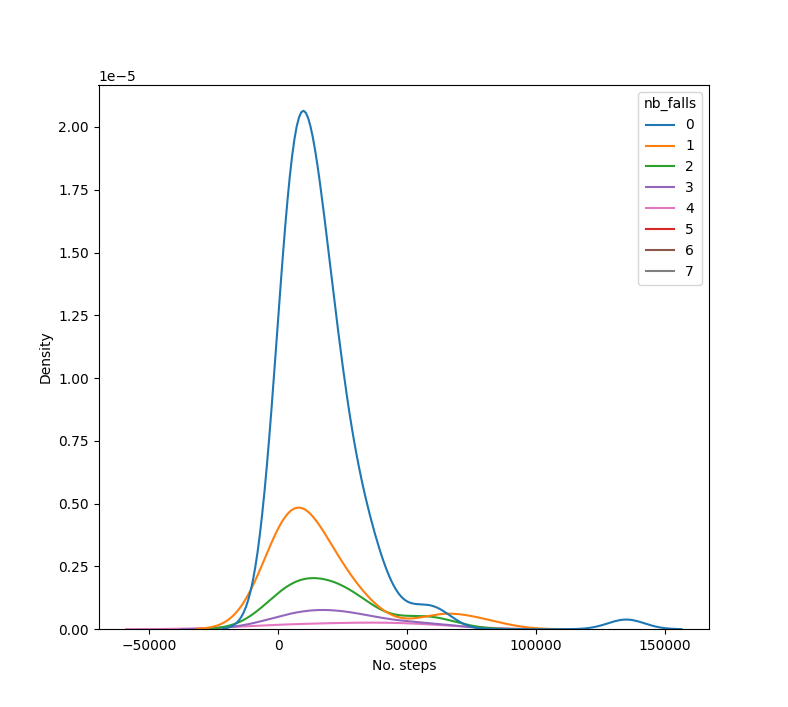

C:\Users\al-abiad\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='No. steps', ylabel='Density'>

In [126]:
plt.figure()
sns.kdeplot(data=result_analyzed, x="No. steps", hue="nb_falls",palette=palette)